In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
np.random.seed(12)

In [2]:
df=pd.read_csv('Matrix_Factorization_Assignment.csv')

In [3]:
df

,Index,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3964,1.0,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,...,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,17258,3.0,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,...,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,20528,NaN,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,...,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,1875,10.0,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,...,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [4]:
df = df[df['Index']%212!=0]

In [5]:
df

,Index,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3964,1.0,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,...,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,17258,3.0,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,...,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,20528,NaN,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,...,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,1875,10.0,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,...,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [6]:
l1 = list(df.columns)
l1.remove(l1[0])
l2=[]
for i in l1:
  if int(i)%212==0:
    l2.append(i)
print(l2)

['0', '212', '424', '636', '848', '1060', '1272', '1484', '1696', '1908', '2120', '2332', '2544', '2756', '2968', '3180', '3392', '3604', '3816', '4028', '4240', '4452', '4664', '4876']


In [7]:
df = df.drop(l2, axis = 1)

In [8]:
df

,Index,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3964,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,3.0,...,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,17258,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,1.0,...,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,20528,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,NaN,...,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,1875,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,NaN,...,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [9]:
df.columns

Index(['Index', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '4990', '4991', '4992', '4993', '4994', '4995', '4996', '4997', '4998',
       '4999'],
      dtype='object', length=4977)

In [10]:
count = df.isnull().sum().sum()
print(count)

87364536


In [11]:
index_list = df["Index"].tolist()
print(index_list)

[11071, 19900, 25325, 31006, 37002, 9280, 28289, 3827, 45072, 13205, 22265, 14378, 33249, 5447, 31349, 37351, 15942, 22377, 4110, 213, 41388, 10159, 20809, 31345, 25057, 4462, 39233, 33646, 23365, 6954, 31028, 33261, 2107, 18239, 32121, 17749, 44770, 47191, 25826, 30442, 41307, 16428, 7984, 6956, 17028, 49823, 26062, 15115, 45180, 34088, 37739, 45744, 47853, 20948, 14084, 27850, 21211, 20636, 6418, 12410, 36138, 4565, 4554, 1603, 27041, 24669, 7333, 41787, 38527, 25965, 43935, 19941, 15751, 1671, 12063, 46788, 15038, 14601, 9324, 2165, 34080, 36449, 29314, 14681, 24185, 46614, 48797, 14301, 42042, 19571, 21282, 34989, 13465, 46127, 44519, 16118, 5211, 34808, 36099, 16734, 40402, 8417, 34213, 3613, 15434, 22290, 4551, 28401, 12828, 32466, 14484, 36303, 17992, 4531, 745, 19319, 36615, 8029, 40707, 1770, 6565, 42251, 40495, 797, 29774, 19220, 6510, 35815, 24958, 3563, 30787, 27912, 12372, 40592, 20607, 18468, 41964, 18712, 7842, 24831, 2883, 42416, 35943, 18035, 33967, 459, 20906, 41546, 

In [12]:
dff = df.drop(['Index'],axis=1)
finalmodifiedArray = dff.to_numpy()
finalmodifiedArray = np.nan_to_num(finalmodifiedArray) 
print(finalmodifiedArray)

[[7. 1. 9. ... 0. 0. 0.]
 [3. 3. 6. ... 0. 9. 2.]
 [7. 0. 9. ... 0. 0. 7.]
 ...
 [9. 0. 3. ... 0. 1. 4.]
 [0. 7. 3. ... 0. 8. 8.]
 [7. 0. 0. ... 0. 2. 0.]]


In [13]:
finalmodifiedArray.shape

(44788, 4976)

# Model

In [14]:
columnNumber = finalmodifiedArray.shape[1]
previousError = 0
finalResult = 0
def MatricsFactorization(K):
    M = np.random.random(size =(columnNumber,K))
    transformer = Normalizer().fit(M)
    N = transformer.transform(M)
    V = N
    I =  np.zeros((K, K), float)
    np.fill_diagonal(I, 1)
    p = 0
    while p<20:
        result = 0
        #USER
        A = (V.T).dot(V)
        B =  ((0.00015 + 0.0001 * (212% 8))*I)
        C = (A + B)
        CC = np.linalg.inv(C)
        D = finalmodifiedArray.dot(V)
        E = D.dot(CC)
        #print(E)
        
        #Movie
        AA = (E.T).dot(E)
        BB = ((0.00025 - 0.0001 * (212% 7))*I)
        CC = (AA + BB)
        CCC = np.linalg.inv(CC)
        DD = (E.T).dot(finalmodifiedArray)
        EE = (DD.T).dot(CCC)
        #print(EE)
        
        
        result = E.dot(EE.T)
        error = 0
        for i in range(len(finalmodifiedArray)):
            for j in range(len(finalmodifiedArray[i])):
                 if finalmodifiedArray[i,j] > 0:
                       error = error + (finalmodifiedArray[i,j] - result[i,j])**2
        
        error = round(error, 4)
        print(result)
        print('Total error:',error)
        print(p)
        if p>0:
            if error >= previousError or error<1 :
                print('--------------------------------Final Result----------------------------------')
                print(finalResult)
                print('-------------------------------------------------------------------------------')
                break
        V = EE
        previousError = error
        finalResult = result
        p = p+1
    return finalResult,previousError

In [15]:
res,finalError = MatricsFactorization(2000)

[[ 8.08744056  2.26796248  5.12969118 ...  1.49922314  2.85729112
  -0.61203801]
 [ 4.94243019  2.50512899  4.06137827 ... -0.66691066  6.87025942
   7.27932281]
 [ 6.72786566  1.3897761   3.66746048 ...  0.16585592  0.57025355
   5.11777719]
 ...
 [ 6.21548171  4.28110535  1.08518558 ...  3.21964997  1.50195544
   1.95334873]
 [-2.09181542  4.66088621  1.40721786 ...  4.41033599  4.09020717
   7.66436095]
 [ 5.21902295 -1.94937583  1.4992442  ...  1.71867518  2.25875561
   0.82122879]]
Total error: 936906630.1189
0
[[ 8.042252    2.55989063  5.5276799  ...  1.31353162  1.96192979
  -1.49044022]
 [ 4.88311509  1.48838472  4.1473101  ... -1.5491817   7.6450655
   5.51750707]
 [ 6.51649354  0.2971856   4.49125107 ... -0.60721458  0.92804258
   4.77977012]
 ...
 [ 5.90765107  3.33623708  0.76098283 ...  2.92289489  1.66805632
   1.45880087]
 [-2.33054217  4.79797108  2.09080987 ...  3.97003215  3.36266561
   7.84416148]
 [ 5.40176229 -1.70560107  1.87333902 ...  2.70250463  2.71248894
   

[[ 7.81838537  5.54708674  5.70542379 ...  0.32328989  1.96804285
   0.35522555]
 [ 4.08896552  2.19276215  5.16591546 ... -1.10255906  4.61447751
  -0.8211254 ]
 [ 5.28693778 -2.26896957  8.44511643 ...  0.17830943  1.44459802
   5.8123927 ]
 ...
 [ 5.00266792 -1.60085029  1.12875408 ...  2.27361261  1.74611782
   2.9770657 ]
 [ 2.94202875  5.39972404  3.83222959 ...  1.30565242  4.02351691
   6.76203426]
 [ 3.77291706 -0.76998291  1.28716454 ...  3.87138636 -1.29324986
   4.86408626]]
Total error: 741359847.7724
16
[[ 7.87863003  5.51239644  5.76874293 ...  0.3516364   1.98586063
   0.30868566]
 [ 4.0524017   2.15125687  5.15288649 ... -1.06483541  4.62217741
  -0.93985954]
 [ 5.29870932 -2.31671579  8.4349421  ...  0.19137007  1.46947984
   5.86914897]
 ...
 [ 5.08712373 -1.64878569  1.13374949 ...  2.30752092  1.64641181
   2.9424407 ]
 [ 2.96006009  5.44848344  3.83674344 ...  1.3172469   3.9915327
   6.82159967]
 [ 3.83209266 -0.70804523  1.27348972 ...  3.84353464 -1.30127367
  

In [16]:
print(finalError)

740611385.0223


In [17]:
finalResult = res
print('----------------------------------------------------------------------')
print(finalResult)
print('-----------------------------------------------------------------------')

----------------------------------------------------------------------
[[ 7.98868502  5.46693504  5.87431094 ...  0.39758013  1.98487142
   0.22970816]
 [ 3.9936798   2.07214829  5.12896492 ... -0.99535468  4.63626235
  -1.13128246]
 [ 5.31934199 -2.40099345  8.40256419 ...  0.20360005  1.52671771
   5.96828471]
 ...
 [ 5.24237543 -1.73692998  1.14007607 ...  2.36564331  1.48138991
   2.89490055]
 [ 2.96014853  5.55292753  3.84427989 ...  1.35277363  3.92723267
   6.9178743 ]
 [ 3.96110117 -0.60247984  1.2597302  ...  3.80632288 -1.30557051
   4.77831352]]
-----------------------------------------------------------------------


# Modified Dataframe

In [18]:
dataframe = pd.DataFrame.from_records(finalResult)

In [19]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975
0,7.988685,5.466935,5.874311,9.716452,3.824935,4.343578,0.358960,0.772236,5.616566,1.481789,...,1.788543,3.084335,3.121533,6.314915,4.862274,8.041509,4.594832,0.397580,1.984871,0.229708
1,3.993680,2.072148,5.128965,1.600804,3.906419,2.919160,6.216527,8.486229,1.769030,2.870189,...,-0.703532,-1.095548,2.850082,5.722686,8.167226,3.655628,0.038563,-0.995355,4.636262,-1.131282
2,5.319342,-2.400993,8.402564,3.869647,7.529477,2.351165,1.066861,-2.641654,5.982079,4.729155,...,-1.673053,1.881728,6.455131,1.585469,0.956876,7.130502,2.716592,0.203600,1.526718,5.968285
3,2.393952,-0.760443,2.208878,3.603434,2.997161,5.176513,1.981135,8.491884,3.896852,0.898380,...,3.122064,4.486424,3.800059,-1.679455,4.069104,2.877424,2.807013,0.317065,4.781485,3.669013
4,1.094574,3.996137,1.181673,3.030543,4.941662,0.436724,0.550523,2.517588,2.045719,2.657499,...,5.212150,0.238160,1.599684,4.465174,4.549588,2.988273,4.604447,6.368668,7.908903,4.545427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44783,1.892127,-0.731732,7.206530,6.710922,1.540880,3.502291,5.346678,0.894422,2.302626,2.704678,...,1.907545,1.647597,5.078320,4.455131,3.267890,3.188390,1.185846,3.830807,-0.135652,0.389638
44784,4.489468,3.216505,4.729696,3.661402,4.184487,6.364927,0.584113,0.203768,1.226429,1.519196,...,2.844253,2.022451,0.530287,4.965978,-0.482547,5.073797,6.240036,-2.230391,1.185418,6.175306
44785,5.242375,-1.736930,1.140076,0.118981,2.123714,4.340397,6.103199,4.022306,3.265784,7.716610,...,1.508161,0.170581,1.798516,-0.336513,1.565951,0.337784,8.302114,2.365643,1.481390,2.894901
44786,2.960149,5.552928,3.844280,-0.750312,4.131624,1.748369,6.667695,2.190791,2.432820,-0.388806,...,-0.716651,-0.235118,-0.221185,0.997404,5.278357,3.528892,0.835085,1.352774,3.927233,6.917874


In [20]:
dataframe.insert(0, "Index",index_list)

In [21]:
dataframe

,Index,0,1,2,3,4,5,6,7,8,...,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975
0,11071,7.988685,5.466935,5.874311,9.716452,3.824935,4.343578,0.358960,0.772236,5.616566,...,1.788543,3.084335,3.121533,6.314915,4.862274,8.041509,4.594832,0.397580,1.984871,0.229708
1,19900,3.993680,2.072148,5.128965,1.600804,3.906419,2.919160,6.216527,8.486229,1.769030,...,-0.703532,-1.095548,2.850082,5.722686,8.167226,3.655628,0.038563,-0.995355,4.636262,-1.131282
2,25325,5.319342,-2.400993,8.402564,3.869647,7.529477,2.351165,1.066861,-2.641654,5.982079,...,-1.673053,1.881728,6.455131,1.585469,0.956876,7.130502,2.716592,0.203600,1.526718,5.968285
3,31006,2.393952,-0.760443,2.208878,3.603434,2.997161,5.176513,1.981135,8.491884,3.896852,...,3.122064,4.486424,3.800059,-1.679455,4.069104,2.877424,2.807013,0.317065,4.781485,3.669013
4,37002,1.094574,3.996137,1.181673,3.030543,4.941662,0.436724,0.550523,2.517588,2.045719,...,5.212150,0.238160,1.599684,4.465174,4.549588,2.988273,4.604447,6.368668,7.908903,4.545427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44783,3964,1.892127,-0.731732,7.206530,6.710922,1.540880,3.502291,5.346678,0.894422,2.302626,...,1.907545,1.647597,5.078320,4.455131,3.267890,3.188390,1.185846,3.830807,-0.135652,0.389638
44784,17258,4.489468,3.216505,4.729696,3.661402,4.184487,6.364927,0.584113,0.203768,1.226429,...,2.844253,2.022451,0.530287,4.965978,-0.482547,5.073797,6.240036,-2.230391,1.185418,6.175306
44785,20528,5.242375,-1.736930,1.140076,0.118981,2.123714,4.340397,6.103199,4.022306,3.265784,...,1.508161,0.170581,1.798516,-0.336513,1.565951,0.337784,8.302114,2.365643,1.481390,2.894901
44786,1875,2.960149,5.552928,3.844280,-0.750312,4.131624,1.748369,6.667695,2.190791,2.432820,...,-0.716651,-0.235118,-0.221185,0.997404,5.278357,3.528892,0.835085,1.352774,3.927233,6.917874


In [22]:
dataframe.columns

Index(['Index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
          4966,    4967,    4968,    4969,    4970,    4971,    4972,    4973,
          4974,    4975],
      dtype='object', length=4977)

# Adding Column Name

In [23]:
columnNames = []
for col in df.columns:
    columnNames.append(col)
print(columnNames)

['Index', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157',

In [24]:
dataframe.columns = columnNames

In [25]:
dataframe

,Index,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,7.988685,5.466935,5.874311,9.716452,3.824935,4.343578,0.358960,0.772236,5.616566,...,1.788543,3.084335,3.121533,6.314915,4.862274,8.041509,4.594832,0.397580,1.984871,0.229708
1,19900,3.993680,2.072148,5.128965,1.600804,3.906419,2.919160,6.216527,8.486229,1.769030,...,-0.703532,-1.095548,2.850082,5.722686,8.167226,3.655628,0.038563,-0.995355,4.636262,-1.131282
2,25325,5.319342,-2.400993,8.402564,3.869647,7.529477,2.351165,1.066861,-2.641654,5.982079,...,-1.673053,1.881728,6.455131,1.585469,0.956876,7.130502,2.716592,0.203600,1.526718,5.968285
3,31006,2.393952,-0.760443,2.208878,3.603434,2.997161,5.176513,1.981135,8.491884,3.896852,...,3.122064,4.486424,3.800059,-1.679455,4.069104,2.877424,2.807013,0.317065,4.781485,3.669013
4,37002,1.094574,3.996137,1.181673,3.030543,4.941662,0.436724,0.550523,2.517588,2.045719,...,5.212150,0.238160,1.599684,4.465174,4.549588,2.988273,4.604447,6.368668,7.908903,4.545427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44783,3964,1.892127,-0.731732,7.206530,6.710922,1.540880,3.502291,5.346678,0.894422,2.302626,...,1.907545,1.647597,5.078320,4.455131,3.267890,3.188390,1.185846,3.830807,-0.135652,0.389638
44784,17258,4.489468,3.216505,4.729696,3.661402,4.184487,6.364927,0.584113,0.203768,1.226429,...,2.844253,2.022451,0.530287,4.965978,-0.482547,5.073797,6.240036,-2.230391,1.185418,6.175306
44785,20528,5.242375,-1.736930,1.140076,0.118981,2.123714,4.340397,6.103199,4.022306,3.265784,...,1.508161,0.170581,1.798516,-0.336513,1.565951,0.337784,8.302114,2.365643,1.481390,2.894901
44786,1875,2.960149,5.552928,3.844280,-0.750312,4.131624,1.748369,6.667695,2.190791,2.432820,...,-0.716651,-0.235118,-0.221185,0.997404,5.278357,3.528892,0.835085,1.352774,3.927233,6.917874


# Recommendation System

In [26]:
nanIndexLst = []
for _, row in df.iterrows():
    nanIndex = row.isnull()
    nanIndexLst += [row[nanIndex].index.tolist()]

In [39]:
next1 = []
dictionary = {}
endList = []
for k in range(30):
     var = nanIndexLst[k]
     for p in range(len(var)):
        t = int(var[p])
        next2 = (t,dataframe.iloc[k][var[p]])  
        next1.append(next2)
     next1.sort(key=lambda pair: pair[1],reverse=True)
     for m in range(len(next1)):
         endList.append(next1[m][0])   
     dictionary[dataframe.iloc[k][0]]=endList[0:5]
     next1.clear()
     endList.clear()
for f, v in dictionary.items():
      print (f, '-->', v)

11071.0 --> [2637, 4536, 2399, 4914, 2421]
19900.0 --> [3089, 2976, 256, 4980, 4854]
25325.0 --> [1579, 1143, 2580, 3622, 1551]
31006.0 --> [3269, 615, 2059, 3382, 1289]
37002.0 --> [3112, 4933, 4668, 3309, 3428]
9280.0 --> [1488, 3407, 4047, 3889, 4702]
28289.0 --> [4704, 2311, 2043, 4686, 4156]
3827.0 --> [3666, 407, 3168, 2671, 4637]
45072.0 --> [2008, 4532, 3233, 4306, 4527]
13205.0 --> [2814, 4950, 3670, 2199, 640]
22265.0 --> [2995, 2616, 3361, 3011, 1478]
14378.0 --> [2199, 601, 539, 3709, 2636]
33249.0 --> [2220, 654, 2558, 2392, 2643]
5447.0 --> [2230, 3261, 3442, 1889, 1941]
31349.0 --> [1563, 2969, 3315, 2966, 3005]
37351.0 --> [1663, 654, 865, 3809, 1316]
15942.0 --> [4274, 2465, 3540, 378, 1963]
22377.0 --> [1648, 302, 1945, 4279, 3095]
4110.0 --> [3606, 1461, 2156, 3844, 339]
213.0 --> [4619, 4496, 2979, 1360, 2143]
41388.0 --> [3055, 2685, 1061, 1333, 1462]
10159.0 --> [2043, 1772, 4211, 631, 452]
20809.0 --> [4209, 2577, 4266, 336, 2148]
31345.0 --> [190, 347, 2032, 503

# Cosine similarities 

In [28]:
Cosine_row = sparse.csr_matrix(finalResult[0:200])
CosineSimilarities_Row = cosine_similarity(Cosine_row,dense_output=False)
print(CosineSimilarities_Row)

  (0, 199)	0.5844489119405701
  (0, 198)	0.5729237678995528
  (0, 197)	0.570003383384274
  (0, 196)	0.5736301848559732
  (0, 195)	0.5775591210903164
  (0, 194)	0.5755158673456111
  (0, 193)	0.5816279564105057
  (0, 192)	0.5827327147533046
  (0, 191)	0.5821334233254571
  (0, 190)	0.5748163701239585
  (0, 189)	0.5808203215157377
  (0, 188)	0.5834148272956421
  (0, 187)	0.5943240084206252
  (0, 186)	0.590693632492973
  (0, 185)	0.58405954175665
  (0, 184)	0.5932393973655001
  (0, 183)	0.5799109321480282
  (0, 182)	0.5875565678535019
  (0, 181)	0.567007926298774
  (0, 180)	0.585859193618554
  (0, 179)	0.5715796204690498
  (0, 178)	0.5705800213473162
  (0, 177)	0.5890170982764454
  (0, 176)	0.5711513442613949
  (0, 175)	0.5855933946184949
  :	:
  (199, 24)	0.5810261007625259
  (199, 23)	0.6018430698981545
  (199, 22)	0.5898150284900275
  (199, 21)	0.5784995694182464
  (199, 20)	0.605435718543875
  (199, 19)	0.5831074753958426
  (199, 18)	0.5746561266911916
  (199, 17)	0.5821353929655256
  (

In [29]:
Cosine_column = sparse.csr_matrix(finalResult)
Cosine_column = Cosine_column.transpose()
Cosine_column = Cosine_column[0:200]
CosineSimilarities_Column = cosine_similarity(Cosine_column,dense_output=False)
print(CosineSimilarities_Column)

  (0, 199)	0.6068077467458067
  (0, 198)	0.6061158695012285
  (0, 197)	0.577151962236243
  (0, 196)	0.590028591558229
  (0, 195)	0.6058569860892721
  (0, 194)	0.5812844088980881
  (0, 193)	0.585107010104951
  (0, 192)	0.5748052300985688
  (0, 191)	0.5860848558959202
  (0, 190)	0.5946846006774014
  (0, 189)	0.5790458741771934
  (0, 188)	0.6019558684911968
  (0, 187)	0.5855287698308403
  (0, 186)	0.5806276499898642
  (0, 185)	0.6085058639031822
  (0, 184)	0.5975000606239368
  (0, 183)	0.596592863048082
  (0, 182)	0.6033502912304158
  (0, 181)	0.5867728213875831
  (0, 180)	0.5777496771202363
  (0, 179)	0.5991908879737091
  (0, 178)	0.5786457239005908
  (0, 177)	0.5944848168703234
  (0, 176)	0.5936993345572417
  (0, 175)	0.5968905987995736
  :	:
  (199, 24)	0.6020384550425115
  (199, 23)	0.6020705183362915
  (199, 22)	0.6096934601388332
  (199, 21)	0.5968365811624784
  (199, 20)	0.6148503041948159
  (199, 19)	0.5868141402429964
  (199, 18)	0.5951737708161241
  (199, 17)	0.6251034383057368


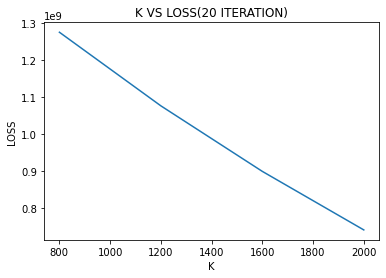

In [30]:
l11 = [800,1200,1600,2000]
l22 = [1275506733.006,1076331151.2385,898993275.7575,740611385.0223]
xlabel = np.array(l11)
ylabel = np.array(l22)
plt.plot(xlabel, ylabel)
plt.title("K VS LOSS(20 ITERATION)")
plt.xlabel("K")
plt.ylabel("LOSS")
plt.show()